# Fourier Transforms

1. Discrete Fourier Transform (DFT)
2. Discrete Cosine Transform (DCT)
3. Discrete Sine Transform (DST)
4. Fast Fourier Transform (FFT)
    

## Discrete Fourier Transform (DFT)

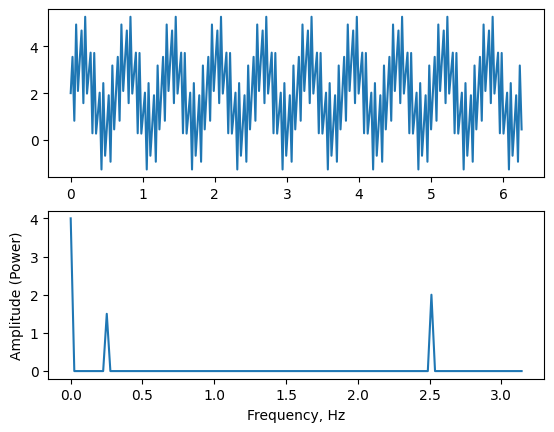

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp, pi
import librosa

a = 0
b = 2*pi
N = 250
T = (b-a)/N
x = np.linspace(0.0, N*T, N, endpoint=False)
y = 2*np.sin(100*x) + 1.5*np.sin(10*x) + 2

#y, sr = librosa.load('A440.wav', dtype=np.float64)
#x = np.linspace(0, len(y), 1, endpoint=False)

def dft(y):
  N = len(y)
  c = np.zeros(N//2+1, dtype=complex)
  for k in range(N//2+1):
     for n in range(N):
       c[k] += y[n] * exp(-2j*pi*k*n/N)  
  return c

c = dft(y)

# Draw graphs
fig, axs = plt.subplots(2)
axs[0].plot(x, y)
axs[1].plot(x[:N//2+1],  2.0/N * np.abs(c))
axs[1].set_xlabel("Frequency, Hz")
axs[1].set_ylabel("Amplitude (Power)")

plt.show()

### Signal Filtering

Max freq: 0


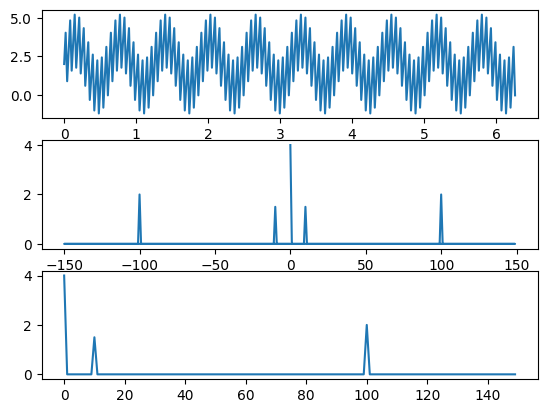

In [2]:
from scipy.fft import fft, rfft, ifft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
from math import pi

a = 0
b = 2*pi
N = 300
T = (b-a)/N
x = np.linspace(0.0, N*T, N, endpoint=False)
y = 2*np.sin(100*x) + 1.5*np.sin(10*x) + 2
yf = fft(y)
xf = fftfreq(N, T)

print("Max freq:",np.argmax(np.abs(yf)))
#print("Max freq:",np.max(xf))

# Draw graphs
fig, axs = plt.subplots(3)
axs[0].plot(x, y)
axs[1].plot(xf*T*N,  2.0/N * np.abs(yf))
axs[2].plot(xf[:N//2]*T*N,  2.0/N * np.abs(yf)[:N//2])

plt.show()

Max freq (HP filtered): 100
Max freq (LP filtered): 10


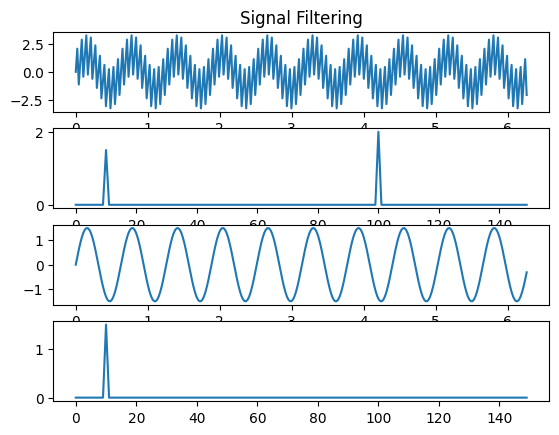

In [3]:
from scipy.fft import fft, rfft, ifft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
from math import pi

a = 0
b = 2*pi
N = 300
T = (b-a)/N
x = np.linspace(0.0, N*T, N, endpoint=False)
y = 2*np.sin(100*x) + 1.5*np.sin(10*x) + 2
yf = rfft(y)
xf = fftfreq(N, T)

# High pass filter
cutoff = 5
hp = np.where(np.abs(xf*T*N) >= cutoff, 1, 0)

yf = yf  * hp[:N//2+1]
y_restored = np.fft.irfft(yf)
yf2 = fft(y_restored)

print("Max freq (HP filtered):",np.argmax(np.abs(yf2)))

# Draw graphs
fig, axs = plt.subplots(4)
axs[0].set_title("Signal Filtering")
axs[0].plot(x, y_restored)
axs[1].plot(xf[:N//2]*T*N,  2.0/N * np.abs(yf2)[:N//2])

# Low pass filter
cutoff = 20
lp = np.zeros(N//2+1) + np.hstack((np.ones(cutoff), np.zeros(N//2+1 - cutoff)))
yf = yf  * lp
y_restored = np.fft.irfft(yf)
yf3 = fft(y_restored)

print("Max freq (LP filtered):",np.argmax(np.abs(yf3)))

axs[2].plot(x, y_restored)
axs[3].plot(xf[:N//2]*T*N,  2.0/N * np.abs(yf3)[:N//2])

plt.show()

## Spectrogram of a Signal

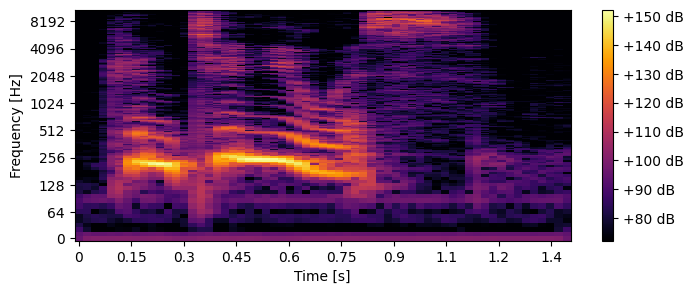

In [4]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.fft import fftshift
import soundfile as sf

# compute a spectrogram of an audio
x, sr = librosa.load('audio.wav', dtype=np.float64)
stft = librosa.stft(x)
spectrogram = np.abs(stft)
spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.min)

# plot spectrogram
plt.figure(figsize=(8, 3))
img = librosa.display.specshow(
        spectrogram_db,
        y_axis="log",
        x_axis="time",
        sr=sr,
        cmap="inferno",
     )
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(img, format="%+2.f dB")
plt.show()

# Ordinary Differential Equations

### Runge-Kutta Method

In [5]:
import sys
import math

def f(x,y):
    return y - x * x

def RK4(x, y, h, N, X):
  h = X / N
  for i in range(0, N):
    k0 = h * f(x, y)
    k1 = h * f(x + h/2, y + k0/2)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h, y + k2)
    y_pred = y + (k0 + 2*k1 + 2*k2 + k3)/6
    x = x + h
    y = y_pred

  return y_pred, k0, k1, k2, k3

x0 = 0
y0 = 1
h = 0.1
N = 1
a = 0
b = 0.1 
X = (b-a)/N

y, k0, k1, k2, k3 = RK4(x0, y0, h, N, X)

print("K0 = %.6f" % k0)
print("K1 = %.6f" % k1)
print("K2 = %.6f" % k2)
print("K3 = %.6f" % k3)
print("y  = %.6f" % y)


K0 = 0.100000
K1 = 0.104750
K2 = 0.104988
K3 = 0.109499
y  = 1.104829
